# DIGHUM 101: How do today's movies express Feminism
**Tianle Yang**<br />
**Summer 2022**<br />

# Background

IWDA is a feminist organisation, on its websites there is a sentence

So what does feminism mean to us? 
Quite simply, feminism is about all genders having EQUAL rights and opportunities.

<img src="IWDA.png" alt="Drawing" style="width: 400px;" align="center"/>

# Import libraries

In [195]:
import requests
from bs4 import BeautifulSoup
import gensim
import nltk
import time
import pandas as pd
from string import digits
from string import punctuation
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import multiprocessing
import nltk
import warnings

warnings.filterwarnings('ignore')

# Data

My own data by webscrapping

Some representative feminist movies were selected in this part of work. In this project, I did not clearly define whether a movie is a feminism movie, because I think defining a movie as a feminism film is far beyond my level. In fact, it is also controversial whether a movie is a feminism movie. Therefore, I selected some movies labeled as "feminism" on Google.

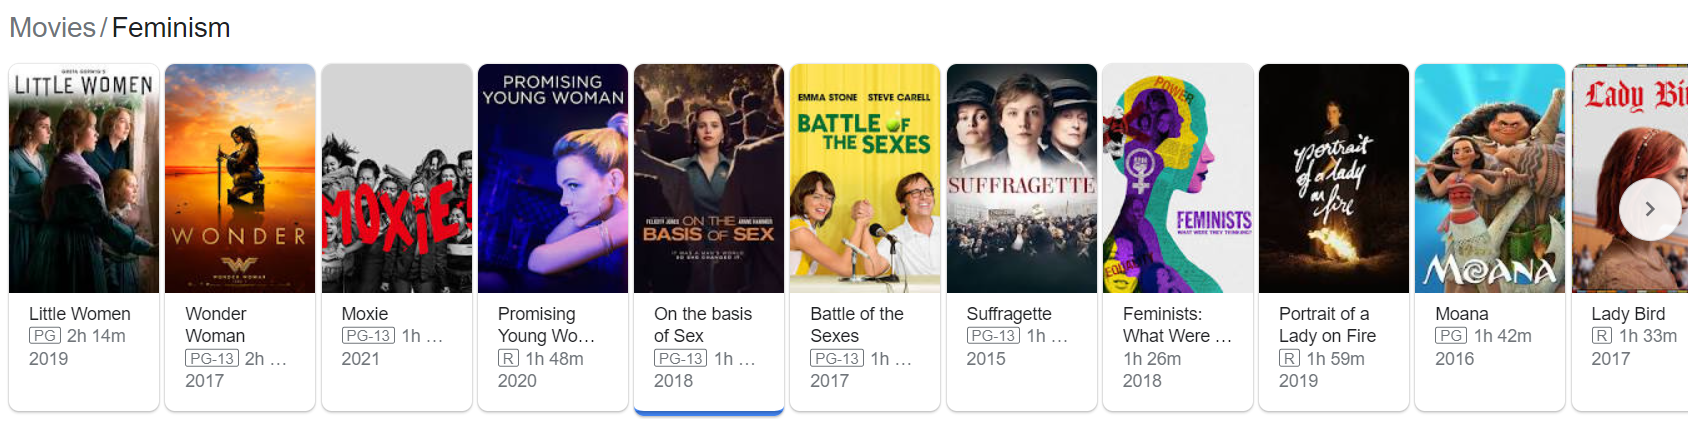

# Start my work

## Request IMDB Website

IMDB website crawling is annoying. I don't know why for the moment. Because I need to send the request repeatedly many times, I store the comments in a TXT file after obtaining the information. I grabbed the comments with a score of 1-4 and the comments with a score of 6-10 respectively, and classified them as negative comments and negativepositive comments.

<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSbpBJKw9OBArrhbJQnsd-qQ5TaEw_cPyzMBSUWkIqCT92LiNM" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="undefined" data-noaft="1" style="width: 160px; height: 220px;">
<font color="AAAAAA">On the Basis of Sex(2018)</font>
<center>

In [4]:
r10 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=10',verify=False)

In [10]:
r9 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=9',verify=False)

In [30]:
r8 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=8',verify=False)

In [38]:
r7 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=7',verify=False)

In [45]:
r4 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=4',verify=False)

In [81]:
r3 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=3',verify=False)

In [91]:
r2 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=2',verify=False)

In [131]:
r1 = requests.get('https://www.imdb.com/title/tt4669788/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=1',verify=False)

## Get mvie reviews

In [132]:
source10 = r10.text
source9 = r9.text
source8 = r8.text
source7 = r7.text
source4 = r4.text
source3 = r3.text
source2 = r2.text
source1 = r1.text

In [140]:
source10

'\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>On the Basis of Sex (2018) - On the Basis of Sex (2018) - User Reviews - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "L

In [133]:
soup10 = BeautifulSoup(source10, 'html5lib')
soup9 = BeautifulSoup(source9, 'html5lib')
soup8 = BeautifulSoup(source8, 'html5lib')
soup7 = BeautifulSoup(source7, 'html5lib')
soup4 = BeautifulSoup(source4, 'html5lib')
soup3 = BeautifulSoup(source3, 'html5lib')
soup2 = BeautifulSoup(source2, 'html5lib')
soup1 = BeautifulSoup(source1, 'html5lib')

In [139]:
soup10

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
         

        <meta charset="utf-8"/>
        <meta content="IE=edge" http-equiv="X-UA-Compatible"/>




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>On the Basis of Sex (2018) - On the Basis of Sex (2018) - User Reviews - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link href="https://www.

In [134]:
reviewlist10 = soup10.find_all("div",class_="text show-more__control")
reviewlist9 = soup9.find_all("div",class_="text show-more__control")
reviewlist8 = soup8.find_all("div",class_="text show-more__control")
reviewlist7 = soup7.find_all("div",class_="text show-more__control")
reviewlist4 = soup4.find_all("div",class_="text show-more__control")
reviewlist3 = soup3.find_all("div",class_="text show-more__control")
reviewlist2 = soup2.find_all("div",class_="text show-more__control")
reviewlist1 = soup1.find_all("div",class_="text show-more__control")

In [138]:
reviewlist10

[<div class="text show-more__control">Hubby and I are Canadian seniors who just saw this movie and we both loved it. I was fighting back tears at the end and experienced a range of emotions throughout. RBG's indomitable spirit, hers and Marty's commitment to each other, and when she truly and passionately finds her voice - we found it truly inspirational! RBG is obviously a remarkable legal mind and the USA is lucky to have someone of her quality on their Supreme Court.<br/><br/>One thing though: I don't understand the reviews that slam the movie as being "political" all we saw was a lawyer sincerely trying to ensure everyone received the same treatment under the law.<br/><br/>Long may she serve!</div>,
 <div class="text show-more__control">I just can't put this movie in words, but I can proudly say it's one of the best films I've ever watched. I may have some biased opinions, since RBG is one of my role models that I have been looking up towards, making this movie so much more powerfu

## Get reviews

3 types:All   Positive    negative

In [142]:
allreview = ""
positivereview = ""
negativereview = ""

listall = [reviewlist10,reviewlist9,reviewlist8,reviewlist7,reviewlist4,reviewlist3,reviewlist2,reviewlist1]
listpositive = [reviewlist10,reviewlist9,reviewlist8,reviewlist7]
listnegative = [reviewlist4,reviewlist3,reviewlist2,reviewlist1]
listindex = [listall,listpositive,listnegative]
sentencelist = []

for idx in range(0,len(listindex)):
    tmplist = listindex[idx]
    for i in range(0,len(tmplist)):
        for j in range(0,len(tmplist[i])):
            txt = tmplist[i][j].text
            sentencelist.append(txt.lower())

            for punc in punctuation:
                txt = txt.replace(punc,"")
            
            if idx==0:
                allreview = allreview + txt
                
            elif idx ==1:
                positivereview = positivereview + txt
                
            else:
                negativereview = negativereview + txt

In [143]:
print(len(positivereview),len(negativereview),len(allreview))

68275 16845 85120


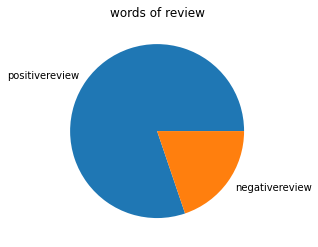

In [144]:
plt.figure(figsize=(12,4))
plt.pie([len(positivereview),len(negativereview)],labels=["positivereview","negativereview"])
plt.title("words of review")
plt.show()

It seems that the audience would like to express more positive response to this film

## Save reviews as txt

To avoid repeated requests for IMDB web pages, the captured text data is stored in a TXT file

In [146]:
# with open('positivereview1.txt','w',encoding='utf-8') as f:
#     f.write(positivereview)
    
# with open('negativereview1.txt','w',encoding='utf-8') as f:
#     f.write(negativereview)
    
# with open('allreview1.txt','w',encoding='utf-8') as f:
#     f.write(allreview)

In [147]:
with open("positivereview1.txt", "r",encoding='utf-8') as f:  
    positivereview1 = f.read()  

with open("negativereview1.txt", "r",encoding='utf-8') as f:  
    negativereview1 = f.read()  
    
with open("allreview1.txt", "r",encoding='utf-8') as f:  
    allreview1 = f.read()  

## Preprocessing text

Remove all the digits in the movie review & Set stop words

In [148]:
allwords1 = allreview1.translate(str.maketrans('', '', digits))
allwordlist1 = allwords1.lower().split()

positivewords1 = positivereview1.translate(str.maketrans('', '', digits))
positivewordlist1 = positivewords1.lower().split()

negativewords1 = negativereview1.translate(str.maketrans('', '', digits))
negativewordlist1 = negativewords1.lower().split()

In [149]:
print(len(allwordlist1),len(positivewordlist1),len(negativewordlist1))

15300 12269 3032


In [150]:
stop_words = stopwords.words('english')
for w in ["movie","good","one","time","great","well","rbg","ginsburg","one","ruth","film","bader"]:
    stop_words.append(w)
allwords_processed1 = [w for w in allwordlist1 if w not in stop_words]
positivewords_processed1 = [w for w in positivewordlist1 if w not in stop_words]
negativewords_processed1 = [w for w in negativewordlist1 if w not in stop_words]

In [151]:
allwords_processed1

['hubby',
 'canadian',
 'seniors',
 'saw',
 'loved',
 'fighting',
 'back',
 'tears',
 'end',
 'experienced',
 'range',
 'emotions',
 'throughout',
 'rbgs',
 'indomitable',
 'spirit',
 'martys',
 'commitment',
 'truly',
 'passionately',
 'finds',
 'voice',
 'found',
 'truly',
 'inspirational',
 'obviously',
 'remarkable',
 'legal',
 'mind',
 'usa',
 'lucky',
 'someone',
 'quality',
 'supreme',
 'courtone',
 'thing',
 'though',
 'dont',
 'understand',
 'reviews',
 'slam',
 'political',
 'saw',
 'lawyer',
 'sincerely',
 'trying',
 'ensure',
 'everyone',
 'received',
 'treatment',
 'lawlong',
 'may',
 'servei',
 'cant',
 'put',
 'words',
 'proudly',
 'say',
 'best',
 'films',
 'ive',
 'ever',
 'watched',
 'may',
 'biased',
 'opinions',
 'since',
 'role',
 'models',
 'looking',
 'towards',
 'making',
 'much',
 'powerful',
 'motivational',
 'watch',
 'enjoyed',
 'every',
 'second',
 'would',
 'definitely',
 'want',
 'recommend',
 'others',
 'wellthe',
 'people',
 'saying',
 'boring',
 'proba

## Word cloud

I did this to see if there were different points between different reviews

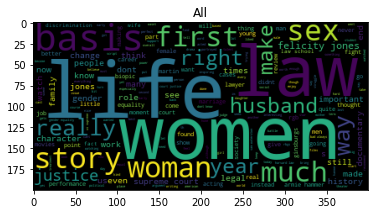

In [152]:
stopwords = STOPWORDS
stopwords.update(["movie","good","one","time","great","well","rbg","ginsburg","one","ruth","film","bader","case"])
 
wc1 = WordCloud(stopwords=stopwords)
wc1.generate(allwords1.lower())

wc2 = WordCloud(stopwords=stopwords)
wc2.generate(positivewords1.lower().lower())

wc3 = WordCloud(stopwords=stopwords)
wc3.generate(negativewords1.lower())

plt.title("All")
plt.imshow(wc1)

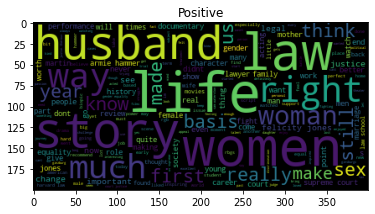

In [153]:
plt.title("Positive")
plt.imshow(wc2)

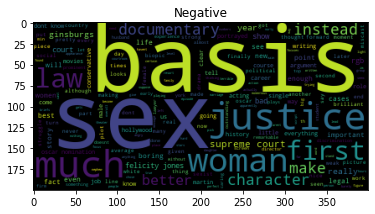

In [154]:
plt.title("Negative")
plt.imshow(wc3)

Whether the attitude of film critics is supportive or critical, they all have some of the same key points

## Word frequency

In [155]:
processed_idx = [allwords_processed1,positivewords_processed1,negativewords_processed1]
dic_idx = [{},{},{}]

for i in range(0,len(processed_idx)):
    for word in processed_idx[i]:
        if word not in dic_idx[i]:
            dic_idx[i][word] = 1
        else:
            dic_idx[i][word] = dic_idx[i][word] + 1
        
keywordall = sorted(dic_idx[0].items(),key=lambda x:x[1],reverse=True)
keywordpositive = sorted(dic_idx[1].items(),key=lambda x:x[1],reverse=True)
keywordnegative = sorted(dic_idx[2].items(),key=lambda x:x[1],reverse=True)

keyword_df1 = pd.DataFrame(keywordall[0:30],columns = ["All", "Frequency"])
keyword_df2= pd.DataFrame(keywordpositive[0:30],columns = ["Positive", "Frequency"])
keyword_df3 = pd.DataFrame(keywordnegative[0:30],columns = ["Negative" ,"Frequency"])
keyword_df = pd.concat([keyword_df1,keyword_df2, keyword_df3],axis=1)
keyword_df

,All,Frequency,Positive,Frequency,Negative,Frequency
0,law,55,law,46,basis,13
1,life,47,life,42,sex,13
2,court,46,jones,39,court,13
3,jones,46,story,35,much,13
4,case,42,like,34,justice,11
5,like,41,case,34,first,9
6,story,40,court,33,law,9
7,would,39,women,32,woman,9
8,much,38,would,31,documentary,9
9,basis,38,husband,28,instead,9


As can be seen from the above table, the three comments have paid attention to some women related issues, such as sex, husband , gender , woman , justice , equality , etc.

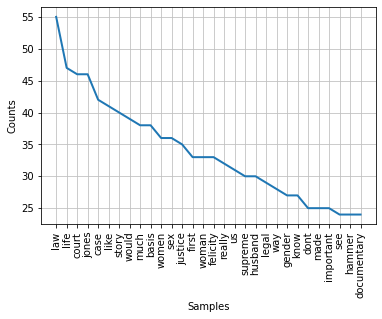

AxesSubplot(0.125,0.125;0.775x0.755)


In [158]:
Freq_dist_nltk=nltk.FreqDist(allwords_processed1)
print(Freq_dist_nltk.plot(30, cumulative=False))

## Get movie tag

In [173]:
r_keywords = requests.get("https://www.imdb.com/title/tt4669788/keywords?ref_=tt_stry_kw",verify=False)

<img src="tags.png" alt="Drawing" style="width: 400px;" align="center"/>

In [175]:
source_keywords1 = r_keywords.text
soup_keywords1 = BeautifulSoup(source_keywords1, 'html5lib')
soup_keywords1

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
         

        <meta charset="utf-8"/>
        <meta content="IE=edge" http-equiv="X-UA-Compatible"/>




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>On the Basis of Sex (2018) - Plot keywords - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link href="https://www.imdb.com/title/tt4669788/key

In [176]:
keywordlist1 = soup_keywords1.find_all("div",class_="sodatext")

allkeywords1 = ""
for i in range(0,len(keywordlist1)):
    keyword = keywordlist1[i].text
    allkeywords1 = allkeywords1 + keyword
allkeywords1

"\n      misogyny\n    \n      courtroom\n    \n      judge\n    \n      teacher\n    \n      caretaker\n    \n      lawyer\n    \n      human rights\n    \n      marriage\n    \n      inspired by a true story\n    \n      american civil liberties union\n    \n      women's rights\n    \n      equality\n    \n      based on true story\n    \n      father son relationship\n    \n      law student\n    \n      cancer\n    \n      ruth bader ginsburg character\n    \n      reference to atticus finch\n    \n      title spoken by character\n    \n      younger version of character\n    \n      mother daughter relationship\n    \n      father daughter relationship\n    \n      harvard law school\n    \n      columbia law school\n    \n      protest\n    \n      demonstration\n    \n      home care\n    \n      u.s. constitution\n    \n      law\n    \n      overhead camera shot\n    \n      1950s\n    \n      1970s\n    \n      feminism\n    \n      women's equality\n    \n      year 1956\n 

## Save tags as txt

In [177]:
with open('allkeywords1.txt','w',encoding='utf-8') as f:
    f.write(allkeywords1)

In [178]:
with open("allkeywords1.txt", "r",encoding='utf-8') as f:  
    allkeywords1 = f.read()  

## Find same topic

Find common parts in the keywords of movie reviews and movie tags 

In [179]:
words = allkeywords1.split()
words2 = keywordall[0:30]
# words
samekeyword = []

for i in range(0,len(words)):
    for j in range(0,len(words2)):
        if words[i]==words2[j][0]:
            samekeyword.append(words[i])
            
samekeyword = set(samekeyword)
print(samekeyword)

{'story', 'law', 'woman', 'life', 'gender'}


## Word2vec

In [198]:
def dropdigits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

reviews_df = pd.DataFrame({"reviews":sentencelist})
reviews_df["reviews"] = reviews_df["reviews"].apply(dropdigits)
reviews_df

,reviews
0,hubby and i are canadian seniors who just saw ...
1,"i just can't put this movie in words, but i ca..."
2,the people that are saying the movie was borin...
3,this movie was very well done. good acting and...
4,beautiful film about the career and life of ru...
...,...
247,then why did they give her one here? this just...
248,this could have been such a good movie. instea...
249,this is just another in a series of cookie cut...
250,"inspiring life, good trailer, such a bad movie..."


In [199]:
split_rows = [row.split() for row in reviews_df["reviews"]]

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
for w in ["movie","good","one","time","great","well","rbg","ginsburg","one","ruth","film","bader"]:
    stop_words.append(w)
split_rows = [w for w in split_rows if w not in stop_words]

In [200]:
cpu_count = multiprocessing.cpu_count()

model = gensim.models.Word2Vec(split_rows, 
                               min_count = 2, 
                               workers = cpu_count, 
                               window = 20, 
                               sg = 1) 
model.wv["woman"]

array([-1.21261507e-01,  8.08670819e-02, -8.55913088e-02,  9.51722115e-02,
       -1.74566787e-02, -4.70464915e-01, -1.38205914e-02,  3.40610594e-01,
       -2.45481521e-01, -5.14614880e-01,  2.82372236e-01, -2.35851854e-01,
       -9.33771059e-02,  8.59045908e-02,  2.19478443e-01,  6.77033812e-02,
        2.19293490e-01,  1.00024566e-01, -9.13784727e-02, -2.86871880e-01,
        9.60015804e-02,  1.45005703e-01,  2.54729331e-01, -1.73636377e-01,
       -1.23126090e-01,  2.28334758e-02, -1.21614903e-01,  1.33688226e-01,
       -1.17920235e-01,  1.68264553e-01,  2.01187983e-01, -1.15160570e-01,
        3.61441225e-01, -2.41746470e-01,  1.06678836e-01,  5.40041625e-01,
        3.44638452e-02, -7.08712488e-02,  7.74439275e-02, -3.26189175e-02,
        2.51226515e-01, -1.89396903e-01, -2.78805159e-02, -2.49743760e-01,
        4.32519652e-02, -3.36936978e-03, -9.93697867e-02, -2.75775522e-01,
        9.68827978e-02, -6.16169674e-03,  1.37912214e-01, -1.35418832e-01,
       -2.70183198e-02,  

In [190]:
model.wv.similarity("woman","right")

0.57560295

In [191]:
model.wv.similarity("gender","right")

0.73129237

In [192]:
model.wv.similarity("female","right")

0.70977885

In [193]:
model.wv.similarity("female","equal")

0.9559011

In [194]:
model.wv.similarity("gender","equal")

0.9143389

In [197]:
feminism_words1 = model.wv.most_similar("gender", topn=10)
pd_words1 = pd.DataFrame(feminism_words1,columns = ["gender","similarity"])

feminism_words2 = model.wv.most_similar("woman", topn=10)
pd_words2 = pd.DataFrame(feminism_words2,columns = ["woman","similarity"])

feminism_words3 = model.wv.most_similar("right", topn=10)
pd_words3 = pd.DataFrame(feminism_words3,columns = ["equality","similarity"])

feminism_words4 = model.wv.most_similar("lgbtq", topn=10)
pd_words4= pd.DataFrame(feminism_words4,columns = ["lgbtq","similarity"])

keyword_df = pd.concat([pd_words1,pd_words2, pd_words3,pd_words4],axis=1)
keyword_df

,gender,similarity,woman,similarity,equality,similarity,lgbtq,similarity
0,show,0.955398,stars,0.959286,religious,0.957902,lobbied,0.996888
1,equality.,0.953633,highest,0.953607,-year-old,0.953035,reasoned,0.996661
2,kind,0.947214,captured,0.952724,comes,0.952345,anti-lynching,0.996497
3,cases,0.946069,(felicity,0.947644,extremely,0.951379,identity,0.996454
4,man,0.945380,career,0.941140,"couple,",0.950703,organizations,0.996389
5,fight,0.942610,job,0.940093,arrogance,0.950001,congress.,0.996116
6,struggle,0.942539,playing,0.939165,socially.raynor,0.949667,simply,0.995499
7,sex.,0.941248,career.,0.936826,"legally,",0.949444,orientation,0.995366
8,impact,0.938906,sit,0.934947,today,0.948902,smug,0.994833
9,profound,0.938510,film.,0.933951,bill,0.948814,"legally,",0.994644


# Part 2 for Wonder Woman

I chose this movie because heroine movies are very popular in recent years. I want to know how they influence their audience with feminism.

<table rules="none" align="center">
    <tr>
        <td>
            <center>
                <img src="https://m.media-amazon.com/images/M/MV5BYTlhNzJjYzYtNGU3My00ZDI5LTgzZDUtYzllYjU1ZmU0YTgwXkEyXkFqcGdeQXVyMjQwMDg0Ng@@._V1_.jpg" data-image-id="rm1442963201-curr" alt="Gal Gadot in Wonder Woman 1984 (2020)" class="sc-7c0a9e7c-0 hXPlvk" width="200" >
                <br/>
                <font color="AAAAAA">Wonder Woman(2020)</font>
            </center>
        </td>
        <td>
            <center>
                <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSxnnpUHDu-N4JFDV1rTDX6gOoSFFYYAwaWZYi4oF5_sgq7afv" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="Wallspace 11x17 Framed Movie Poster - Marriage Story : Home &amp; Kitchen" data-noaft="1" width=" 200">
                <br/>
                <font color="AAAAAA">Black Widow (2020)</font>
            </center>
        </td>
    </tr>
</table>

In [208]:
r10 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=10',verify=False)

In [215]:
r9 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=9',verify=False)

In [220]:
r8 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=8',verify=False)

In [233]:
r7 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=7',verify=False)

In [237]:
r6 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=6',verify=False)

In [244]:
r4 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=4',verify=False)

In [251]:
r3 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=3',verify=False)

In [269]:
r2 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=2',verify=False)

In [281]:
r1 = requests.get('https://www.imdb.com/title/tt0451279/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=1',verify=False)

In [282]:
source10 = r10.text
source9 = r9.text
source8 = r8.text
source7 = r7.text
source4 = r4.text
source3 = r3.text
source2 = r2.text
source1 = r1.text

In [283]:
soup10 = BeautifulSoup(source10, 'html5lib')
soup9 = BeautifulSoup(source9, 'html5lib')
soup8 = BeautifulSoup(source8, 'html5lib')
soup7 = BeautifulSoup(source7, 'html5lib')
soup4 = BeautifulSoup(source4, 'html5lib')
soup3 = BeautifulSoup(source3, 'html5lib')
soup2 = BeautifulSoup(source2, 'html5lib')
soup1 = BeautifulSoup(source1, 'html5lib')

In [285]:
reviewlist10 = soup10.find_all("div",class_="text show-more__control")
reviewlist9 = soup9.find_all("div",class_="text show-more__control")
reviewlist8 = soup8.find_all("div",class_="text show-more__control")
reviewlist7 = soup7.find_all("div",class_="text show-more__control")
reviewlist4 = soup10.find_all("div",class_="text show-more__control")
reviewlist3 = soup9.find_all("div",class_="text show-more__control")
reviewlist2 = soup8.find_all("div",class_="text show-more__control")
reviewlist1 = soup7.find_all("div",class_="text show-more__control")

In [286]:
reviewlist10 = soup10.find_all("div",class_="text show-more__control")
reviewlist9 = soup9.find_all("div",class_="text show-more__control")
reviewlist8 = soup8.find_all("div",class_="text show-more__control")
reviewlist7 = soup7.find_all("div",class_="text show-more__control")
reviewlist4 = soup4.find_all("div",class_="text show-more__control")
reviewlist3 = soup3.find_all("div",class_="text show-more__control")
reviewlist2 = soup2.find_all("div",class_="text show-more__control")
reviewlist1 = soup1.find_all("div",class_="text show-more__control")

In [287]:
allreview = ""
positivereview = ""
negativereview = ""

listall = [reviewlist10,reviewlist9,reviewlist8,reviewlist7,reviewlist4,reviewlist3,reviewlist2,reviewlist1]
listpositive = [reviewlist10,reviewlist9,reviewlist8,reviewlist7]
listnegative = [reviewlist4,reviewlist3,reviewlist2,reviewlist1]
listindex = [listall,listpositive,listnegative]
sentencelist = []

for idx in range(0,len(listindex)):
    tmplist = listindex[idx]
    for i in range(0,len(tmplist)):
        for j in range(0,len(tmplist[i])):
            txt = tmplist[i][j].text
            sentencelist.append(txt.lower())

            for punc in punctuation:
                txt = txt.replace(punc,"")
            
            if idx==0:
                allreview = allreview + txt
                
            elif idx ==1:
                positivereview = positivereview + txt
                
            else:
                negativereview = negativereview + txt

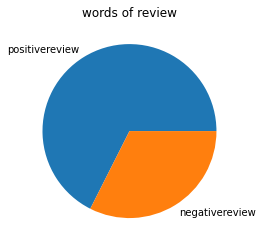

In [288]:
plt.figure(figsize=(12,4))
plt.pie([len(positivereview),len(negativereview)],labels=["positivereview","negativereview"])
plt.title("words of review")
plt.show()

In [289]:
# with open('positivereview2.txt','w',encoding='utf-8') as f:
#     f.write(positivereview)
    
# with open('negativereview2.txt','w',encoding='utf-8') as f:
#     f.write(negativereview)
    
# with open('allreview2.txt','w',encoding='utf-8') as f:
#     f.write(allreview)

In [293]:
with open("positivereview2.txt", "r",encoding='utf-8') as f:  
    positivereview1 = f.read()  

with open("negativereview2.txt", "r",encoding='utf-8') as f:  
    negativereview1 = f.read()  
    
with open("allreview2.txt", "r",encoding='utf-8') as f:  
    allreview1 = f.read()  

In [294]:
allwords1 = allreview1.translate(str.maketrans('', '', digits))
allwordlist1 = allwords1.lower().split()

positivewords1 = positivereview1.translate(str.maketrans('', '', digits))
positivewordlist1 = positivewords1.lower().split()

negativewords1 = negativereview1.translate(str.maketrans('', '', digits))
negativewordlist1 = negativewords1.lower().split()

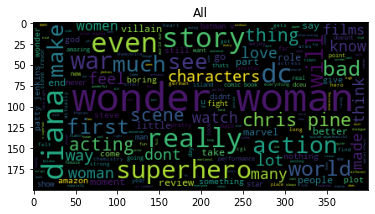

In [302]:
stopwords = STOPWORDS
stopwords.update(["character","good","gal","gadot","best","movies"])  #,"well","rbg","ginsburg","one","ruth","film","bader","case"])
 
wc1 = WordCloud(stopwords=stopwords)
wc1.generate(allwords1.lower())

wc2 = WordCloud(stopwords=stopwords)
wc2.generate(positivewords1.lower().lower())

wc3 = WordCloud(stopwords=stopwords)
wc3.generate(negativewords1.lower())

plt.title("All")
plt.imshow(wc1)

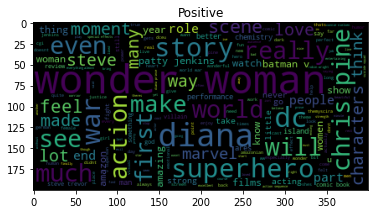

In [303]:
plt.title("Positive")
plt.imshow(wc2)

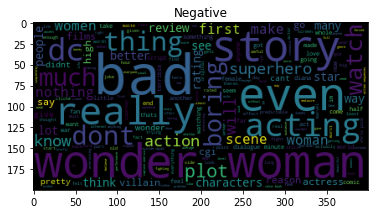

In [304]:
plt.title("Negative")
plt.imshow(wc3)

In [310]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
for w in ["character","good","gal","gadot","best","movies"]:
    stop_words.append(w)
allwords_processed1 = [w for w in allwordlist1 if w not in stop_words]
positivewords_processed1 = [w for w in positivewordlist1 if w not in stop_words]
negativewords_processed1 = [w for w in negativewordlist1 if w not in stop_words]

In [311]:
processed_idx = [allwords_processed1,positivewords_processed1,negativewords_processed1]
dic_idx = [{},{},{}]

for i in range(0,len(processed_idx)):
    for word in processed_idx[i]:
        if word not in dic_idx[i]:
            dic_idx[i][word] = 1
        else:
            dic_idx[i][word] = dic_idx[i][word] + 1
        
keywordall = sorted(dic_idx[0].items(),key=lambda x:x[1],reverse=True)
keywordpositive = sorted(dic_idx[1].items(),key=lambda x:x[1],reverse=True)
keywordnegative = sorted(dic_idx[2].items(),key=lambda x:x[1],reverse=True)

keyword_df1 = pd.DataFrame(keywordall[0:30],columns = ["All", "Frequency"])
keyword_df2= pd.DataFrame(keywordpositive[0:30],columns = ["Positive", "Frequency"])
keyword_df3 = pd.DataFrame(keywordnegative[0:30],columns = ["Negative" ,"Frequency"])
keyword_df = pd.concat([keyword_df1,keyword_df2, keyword_df3],axis=1)
keyword_df

,All,Frequency,Positive,Frequency,Negative,Frequency
0,movie,456,movie,262,movie,195
1,woman,263,wonder,196,woman,68
2,wonder,254,woman,195,wonder,58
3,film,187,film,147,bad,51
4,one,134,diana,107,like,51
5,like,130,one,91,story,44
6,story,120,war,86,one,43
7,diana,118,dc,83,even,43
8,action,113,action,82,film,40
9,dc,113,like,79,really,39


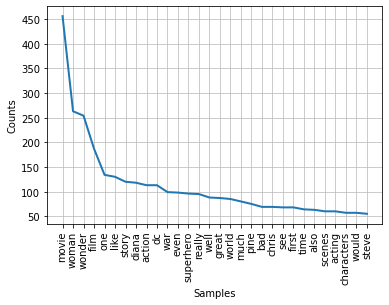

AxesSubplot(0.125,0.125;0.775x0.755)


In [312]:
Freq_dist_nltk=nltk.FreqDist(allwords_processed1)
print(Freq_dist_nltk.plot(30, cumulative=False))

In [325]:
r_keywords = requests.get("https://www.imdb.com/title/tt4669788/keywords?ref_=tt_stry_kw",verify=False)

In [326]:
source_keywords1 = r_keywords.text
soup_keywords1 = BeautifulSoup(source_keywords1, 'html5lib')
soup_keywords1

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
         

        <meta charset="utf-8"/>
        <meta content="IE=edge" http-equiv="X-UA-Compatible"/>




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>On the Basis of Sex (2018) - Plot keywords - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        <link href="https://www.imdb.com/title/tt4669788/key

In [327]:
keywordlist1 = soup_keywords1.find_all("div",class_="sodatext")

allkeywords1 = ""
for i in range(0,len(keywordlist1)):
    keyword = keywordlist1[i].text
    allkeywords1 = allkeywords1 + keyword

In [ ]:
# save txt

In [328]:
words = allkeywords1.split()
words2 = keywordall[0:30]
# words
samekeyword = []

for i in range(0,len(words)):
    for j in range(0,len(words2)):
        if words[i]==words2[j][0]:
            samekeyword.append(words[i])
            
samekeyword = set(samekeyword)
print(samekeyword)

{'story', 'woman'}


In [329]:
def dropdigits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

reviews_df = pd.DataFrame({"reviews":sentencelist})
reviews_df["reviews"] = reviews_df["reviews"].apply(dropdigits)
reviews_df

,reviews
0,i know gal gadot because the fast & furious mo...
1,"dc made best superhero woman movie,my favorite..."
2,patty jenkins' 'wonder woman' movie begins wit...
3,before becoming wonder women she was known as ...
4,this movie is everything a young girl needs to...
...,...
393,this is my first review in this website and by...
394,worst movie i've been dragged to. the want my ...
395,anyone who saw the original wonder woman movie...
396,my god such a huge mess like other female lead...


In [330]:
split_rows = [row.split() for row in reviews_df["reviews"]]

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
for w in ["movie","good","one","time","great","well","rbg","ginsburg","one","ruth","film","bader"]:
    stop_words.append(w)
split_rows = [w for w in split_rows if w not in stop_words]

In [331]:
cpu_count = multiprocessing.cpu_count()

model = gensim.models.Word2Vec(split_rows, 
                               min_count = 2, 
                               workers = cpu_count, 
                               window = 20, 
                               sg = 1) 
model.wv["woman"]

array([-0.13169508,  0.48183906,  0.0649677 ,  0.00532245, -0.125913  ,
        0.24315056,  0.11265514,  0.53963405, -0.38563865, -0.2810429 ,
       -0.39789718, -0.67396957,  0.10922795,  0.04875166,  0.39991435,
       -0.03318581,  0.044744  , -0.18649653, -0.26827267, -0.14370136,
        0.4111297 ,  0.12193454, -0.02640413, -0.13716514,  0.07078838,
        0.30457175, -0.17613576, -0.25328693, -0.13206676, -0.01161588,
        0.25034648, -0.28651685,  0.00803269, -0.5083998 , -0.23584934,
        0.47947523, -0.11756793, -0.26969123, -0.1967267 , -0.48372486,
       -0.31103247,  0.32976922, -0.02609976, -0.15731943,  0.50404006,
       -0.24490634, -0.03943685, -0.03451325, -0.06361832,  0.03325989,
        0.39828798, -0.17750312, -0.35458994, -0.1465457 , -0.14901404,
       -0.23579437,  0.04299057, -0.04428279, -0.03632495, -0.4915019 ,
        0.01024839,  0.15392293,  0.01172443,  0.1879339 , -0.04387334,
        0.1034437 , -0.28718457,  0.34182462, -0.45481765, -0.09

In [332]:
model.wv.similarity("woman","right")

0.36530754

In [333]:
model.wv.similarity("woman","equal")

0.55322003

# Conclusion

In fact, those films defined as feminism are affecting their audiences. In my project, it's hard to say that this kind of influence is very extensive, because I only studied film reviews, and the data set is limited. However, it can be explained that the ideas that feminist films want to express will have influence to public opinion, and can even be extended to the discussion of other social topics, such as LGBT displayed in the project.

It is undeniable that there are many controversies about feminist films. There are supporters and critics, but this is not a bad thing, because they argue about feminism, equality, power and gender bias. The debate itself is progressive.

In addition, the super heroine films which are very popular in recent years are also widely regarded as feminism films. But from my research, they didn't cause too much discussion about feminist among the audience. On the contrary, the audience cared more about the plot and movie itself.

Finally, we can see that although the similarity grade of EQUAL in Wonder Woman is lower than that of traditional feminist films, it is still higher than that of other words, which shows that what IWDA said--

So what does feminism mean to us? Quite simply, feminism is about all genders having EQUAL rights and opportunities.